In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Dataset BG + Gestos

In [42]:
background = pd.read_csv("../data/processed/background.csv")
foreground = pd.read_csv("../data/processed/newTrain.csv")
foreground_test = pd.read_csv("../data/processed/newTest.csv")

In [7]:
display(background.head())
display(foreground.head())

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,73.0,91.0,102.0,97.0,81.0,101.0,80.0,75.0,74.0,64.0,...,92.0,88.0,90.0,181.0,213.0,207.0,171.0,170.0,97.0,other
1,79.0,85.0,101.0,94.0,89.0,91.0,77.0,77.0,70.0,67.0,...,97.0,82.0,93.0,201.0,207.0,197.0,152.0,170.0,100.0,other
2,68.0,86.0,102.0,89.0,87.0,88.0,71.0,75.0,70.0,66.0,...,91.0,82.0,121.0,218.0,198.0,192.0,159.0,168.0,101.0,other
3,66.0,95.0,98.0,86.0,88.0,81.0,70.0,75.0,68.0,56.0,...,96.0,84.0,143.0,206.0,194.0,194.0,163.0,163.0,93.0,other
4,66.0,95.0,98.0,86.0,88.0,81.0,70.0,75.0,68.0,56.0,...,96.0,84.0,143.0,206.0,194.0,194.0,163.0,163.0,93.0,other


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,A,197,195,196,195,197,196,195,196,196,...,84,65,182,213,211,212,212,213,213,213
1,A,142,144,144,146,147,149,150,151,153,...,178,179,179,180,181,182,182,182,183,183
2,A,198,200,201,200,199,198,198,197,198,...,100,99,99,98,99,98,100,100,101,100
3,A,231,232,234,237,238,241,243,244,248,...,90,66,199,255,255,255,255,255,255,255
4,A,147,149,150,152,153,153,152,153,154,...,174,165,166,165,166,169,167,133,135,140


In [28]:
X_background = background.drop("label", axis=1)
X_foreground = foreground.drop("label", axis=1)

In [31]:
X_background.columns = X_foreground.columns

In [36]:
# New DFs

new_fg = X_foreground
new_fg["label"] = foreground["label"]

new_bg = X_background
new_bg["label"] = background["label"]


In [84]:
data = pd.concat([new_fg, new_bg, foreground_test])

data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,197.0,195.0,196.0,195.0,197.0,196.0,195.0,196.0,196.0,196.0,...,65.0,182.0,213.0,211.0,212.0,212.0,213.0,213.0,213.0,A
1,142.0,144.0,144.0,146.0,147.0,149.0,150.0,151.0,153.0,154.0,...,179.0,179.0,180.0,181.0,182.0,182.0,182.0,183.0,183.0,A
2,198.0,200.0,201.0,200.0,199.0,198.0,198.0,197.0,198.0,199.0,...,99.0,99.0,98.0,99.0,98.0,100.0,100.0,101.0,100.0,A
3,231.0,232.0,234.0,237.0,238.0,241.0,243.0,244.0,248.0,249.0,...,66.0,199.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,A
4,147.0,149.0,150.0,152.0,153.0,153.0,152.0,153.0,154.0,154.0,...,165.0,166.0,165.0,166.0,169.0,167.0,133.0,135.0,140.0,A


In [85]:
data.shape

(14171, 785)

In [86]:
X.values

array([[0.77254902, 0.76470588, 0.76862745, ..., 0.83529412, 0.83529412,
        0.83529412],
       [0.55686275, 0.56470588, 0.56470588, ..., 0.71372549, 0.71764706,
        0.71764706],
       [0.77647059, 0.78431373, 0.78823529, ..., 0.39215686, 0.39607843,
        0.39215686],
       ...,
       [0.67058824, 0.67058824, 0.67058824, ..., 0.25882353, 0.23529412,
        0.23137255],
       [0.69803922, 0.69803922, 0.69803922, ..., 0.18823529, 0.16078431,
        0.15294118],
       [0.68627451, 0.69019608, 0.69019608, ..., 0.1254902 , 0.09019608,
        0.08627451]])

In [60]:
#data.to_csv("../data/processed/data.csv", index=False)

In [61]:
data.label.value_counts()

other    5509
A        1457
F        1451
Y        1450
B        1442
T        1434
V        1428
Name: label, dtype: int64

## Pruebas RN

In [2]:
data = pd.read_csv("../data/processed/data.csv")

X = data.drop("label", axis=1)
y = data["label"]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [9]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [5]:
img_rows, img_cols = 28, 28
num_classes = 7
batch_size = 128
epochs = 12

# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_train_vector = X_train.values.reshape((X_train.shape[0], img_rows, img_cols))
X_test_vector = X_test.values.reshape((X_test.shape[0], img_rows, img_cols))


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], 1, img_rows, img_cols)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], img_rows, img_cols, 1)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train_vector = X_train_vector.astype('float32') / 255
X_test_vector = X_test_vector.astype('float32') / 255

print('x_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
y_train_vector = y_train.values
y_test_vector = y_test.values

x_train shape: (11336, 28, 28, 1)
11336 train samples
2835 test samples


In [454]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(20, 20),
                 activation='relu',
                 input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [461]:
# Fit the NN
batch_size = 20
epochs = 10

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_vector, y_test_vector))

Train on 11336 samples, validate on 2835 samples
Epoch 1/10
11336/11336 [==============================] - 5s 473us/step - loss: 1.4087 - accuracy: 0.4203 - val_loss: 1.3043 - val_accuracy: 0.5072
Epoch 2/10
11336/11336 [==============================] - 5s 443us/step - loss: 1.3315 - accuracy: 0.4773 - val_loss: 1.0572 - val_accuracy: 0.6102
Epoch 3/10
11336/11336 [==============================] - 5s 431us/step - loss: 1.2250 - accuracy: 0.5358 - val_loss: 0.9268 - val_accuracy: 0.7153
Epoch 4/10
11336/11336 [==============================] - 5s 438us/step - loss: 1.1365 - accuracy: 0.5752 - val_loss: 0.9331 - val_accuracy: 0.7044
Epoch 5/10
11336/11336 [==============================] - 5s 447us/step - loss: 1.0712 - accuracy: 0.5993 - val_loss: 0.7861 - val_accuracy: 0.7601
Epoch 6/10
11336/11336 [==============================] - 5s 446us/step - loss: 1.0330 - accuracy: 0.6205 - val_loss: 0.7339 - val_accuracy: 0.7538
Epoch 7/10
11336/11336 [==============================] - 5s 43

In [462]:
# Evaluate the model with test data
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5816879032780884
Test accuracy: 0.8261023163795471


In [36]:
# Gráfico función pérdida + accuracy

"""import matplotlib.pyplot as plt

history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()"""

NameError: name 'history' is not defined

### Segundo modelo mucho más grande por la noche

In [441]:
## This is the neural network proposed architecture
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [442]:
# Fit the NN
batch_size = 120
epochs = 500

model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

ValueError: Error when checking input: expected conv2d_65_input to have 4 dimensions, but got array with shape (11336, 784)

### Guardando el modelo

In [11]:
'''
# serialize model to JSON
model_json = model2.to_json()
with open("../output/models/sequential_500epochs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("../output/models/sequential_500epochs.h5")
print("Saved model to models directory.")'''

# Guardar arquitectura + pesos en un solo archivo HDF5

model2.save("../output/models/sequential_500epochs.json")
model.save("../output/models/sequential_30epochs.json")
print("Saved model to models directory.")

Saved model to models directory.


### Probando el modelo

Predict y predict_proba me devuelve el mismo array.

In [396]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_vector)
#print("Accuracy score: ", accuracy_score(y_test, y_pred, normalize=False))

In [397]:
predict = np.argmax(y_pred, axis=1)
reality = np.argmax(y_test_vector, axis=1)

In [398]:
print("Accuracy score: ", accuracy_score(reality, predict))

Accuracy score:  1.0


In [79]:
y_test[865]

array([0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [80]:
y_pred[865]

array([2.5954979e-13, 1.6716356e-13, 1.0000000e+00, 9.3996338e-12,
       4.4506796e-16, 3.8997217e-14, 7.6325139e-15], dtype=float32)

Accuracy de 1... Demasiado locura.
#### Pruebo modelo con muestra fuera del dataset

In [16]:
from resizeimage import resizeimage

def tryImage(path):
    with open(path, 'r+b') as f:
        with Image.open(f) as image:
            cover = resizeimage.resize_cover(image, [28, 28])
            img = cover.convert('L')
            arr = np.array(img).flatten().reshape((1,28,28,1))
            return arr


def plotImage(path):
    with open(path, 'r+b') as f:
        with Image.open(f) as image:
            cover = resizeimage.resize_cover(image, [28, 28])
            img = cover.convert('L')
            return img


In [476]:
img = plotImage('pruebas/prueba5.jpg')
arr = tryImage('pruebas/prueba5.jpg')

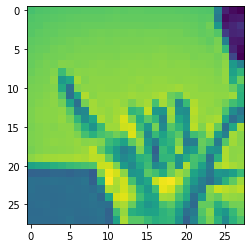

In [483]:
plt.imshow(np.asarray(X_test.loc[14055]).reshape((28,28)))

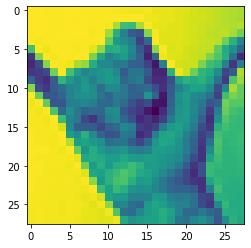

In [482]:
plt.imshow(arr.reshape((28,28)))

In [479]:
y_test_vector[0]



array([0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [480]:
model.predict(arr)

array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [464]:
y_test[y_test.Y == 1]

,A,B,F,T,V,Y,other
6648,0,0,0,0,0,1,0
6407,0,0,0,0,0,1,0
6698,0,0,0,0,0,1,0
6355,0,0,0,0,0,1,0
13930,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
13864,0,0,0,0,0,1,0
5769,0,0,0,0,0,1,0
6017,0,0,0,0,0,1,0
14055,0,0,0,0,0,1,0


## Modelo con mucho más ruido

In [260]:
data = pd.read_csv("../data/processed/noisyData.csv")

In [261]:
X = data.drop("label", axis=1)
y = data["label"]

In [277]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

img_rows, img_cols = 28, 28
num_classes = 7
batch_size = 128
epochs = 12

# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_train_vector = X_train.values.reshape((X_train.shape[0], img_rows, img_cols))
X_test_vector = X_test.values.reshape((X_test.shape[0], img_rows, img_cols))


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], 1, img_rows, img_cols)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], img_rows, img_cols, 1)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

'''# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train_vector = X_train_vector.astype('float32') / 255
X_test_vector = X_test_vector.astype('float32') / 255'''

print('x_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
y_train_vector = y_train.values
y_test_vector = y_test.values

## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (25907, 28, 28, 1)
25907 train samples
6477 test samples


In [283]:
# Fit the NN
batch_size = 32
epochs = 5

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_vector, y_test_vector))

Train on 25907 samples, validate on 6477 samples
Epoch 1/5
25907/25907 [==============================] - 63s 2ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 1.6981e-07 - val_accuracy: 1.0000
Epoch 2/5
25907/25907 [==============================] - 63s 2ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 8.9426e-08 - val_accuracy: 1.0000
Epoch 3/5
25907/25907 [==============================] - 64s 2ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 3.8052e-07 - val_accuracy: 1.0000
Epoch 4/5
25907/25907 [==============================] - 64s 2ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 2.0901e-05 - val_accuracy: 1.0000
Epoch 5/5
25907/25907 [==============================] - 64s 2ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 3.5374e-08 - val_accuracy: 1.0000


In [285]:
# Evaluate the model with test data
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("../output/models/noisyData_5epochs.json")

Test loss: 3.5373611647829083e-08
Test accuracy: 1.0


In [307]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = model.predict(X_test_vector)
predict = np.argmax(y_pred, axis=1)
reality = np.argmax(y_test_vector, axis=1)
print("Accuracy score: ", accuracy_score(reality, predict))
print("F score: ", f1_score(reality, predict, average=None))


Accuracy score:  1.0
F score:  [1. 1. 1. 1. 1. 1. 1.]


In [291]:
y_pred[865], y_test_vector[865]

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3720337e-33, 0.0000000e+00, 1.0000000e+00], dtype=float32),
 array([0, 0, 0, 0, 0, 0, 1], dtype=uint8))

In [303]:
img = plotImage('pruebas/prueba3.jpeg')
arr = tryImage('pruebas/prueba3.jpeg')

In [304]:
model.predict(arr)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4494786e-31,
        5.3927119e-20, 6.2993355e-27, 1.0000000e+00]], dtype=float32)

In [305]:
y_test# Evaluate the model with test data
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("../output/models/noisyData_5epochs.json")# Evaluate the model with test data
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("../output/models/noisyData_5epochs.json")

,A,B,F,T,V,Y,other
9997,0,0,0,0,0,0,1
26299,0,0,0,0,1,0,0
3053,0,0,0,0,0,0,1
1815,0,0,0,0,0,0,1
32050,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
11176,0,0,0,0,0,0,1
14623,0,0,0,0,0,0,1
4455,0,0,0,0,0,0,1
17329,0,0,0,0,0,0,1


## Modelo con ruido balanceado y mejor

In [308]:
data = pd.read_csv("../data/processed/data_2# Fit the NN
batch_size = 32
epochs = 5

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_vector, y_test_vector))# Evaluate the model with test data
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("../output/models/noisyData_5epochs.json").csv")

In [309]:
X = data.drop("label", axis=1)
y = data["label"]

In [310]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

img_rows, img_cols = 28, 28
num_classes = 7
batch_size = 128
epochs = 12

# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_train_vector = X_train.values.reshape((X_train.shape[0], img_rows, img_cols))
X_test_vector = X_test.values.reshape((X_test.shape[0], img_rows, img_cols))


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], 1, img_rows, img_cols)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], img_rows, img_cols, 1)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('x_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
y_train_vector = y_train.values
y_test_vector = y_test.values

## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model# Evaluate the model with test data
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("../output/models/noisyData_5epochs.json").add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (13489, 28, 28, 1)
13489 train samples
3373 test samples


In [311]:
# Fit the NN
batch_size = 32
epochs = 5

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_vector, y_test_vector))

Train on 13489 samples, validate on 3373 samples
Epoch 1/5
13489/13489 [==============================] - 31s 2ms/step - loss: 1.0761 - accuracy: 0.8529 - val_loss: 0.0765 - val_accuracy: 0.9733
Epoch 2/5
13489/13489 [==============================] - 29s 2ms/step - loss: 0.0954 - accuracy: 0.9732 - val_loss: 0.0102 - val_accuracy: 0.9970
Epoch 3/5
13489/13489 [==============================] - 28s 2ms/step - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0162 - val_accuracy: 0.9953
Epoch 4/5
13489/13489 [==============================] - 29s 2ms/step - loss: 0.0214 - accuracy: 0.9926 - val_loss: 0.0055 - val_accuracy: 0.9982
Epoch 5/5
13489/13489 [==============================] - 28s 2ms/step - loss: 0.0224 - accuracy: 0.9944 - val_loss: 0.0013 - val_accuracy: 0.9994


In [312]:
# Evaluate the model with test data
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("../output/models/data_2_5epochs.json")

Test loss: 0.0012793392593377507
Test accuracy: 0.9994070529937744


In [313]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = model.predict(X_test_vector)
predict = np.argmax(y_pred, axis=1)
reality = np.argmax(y_test_vector, axis=1)
print("Accuracy score: ", accuracy_score(reality, predict))
print("F score: ", f1_score(reality, predict, average=None))


Accuracy score:  0.9994070560332049
F score:  [0.99828473 1.         1.         1.         0.99829642 1.
 0.99938462]


In [314]:
y_pred[865], y_test_vector[865]

(array([1.2759675e-17, 9.9177769e-26, 1.0642394e-21, 2.6498999e-22,
        1.0329587e-18, 4.7052531e-22, 1.0000000e+00], dtype=float32),
 array([0, 0, 0, 0, 0, 0, 1], dtype=uint8))

In [356]:
img = plotImage('pruebas/prueba1.jpg')
arr = tryImage('pruebas/prueba1.jpg')

In [318]:
model.predict(arr)

array([[1.9456358e-07, 9.2395531e-08, 6.7506399e-08, 1.5329319e-04,
        2.7089988e-04, 7.8341151e-03, 9.9174130e-01]], dtype=float32)

## K-Fold Cross Validation con este modelo

In [350]:
from sklearn.preprocessing import LabelEncoder

# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_vector = X.values.reshape((X.shape[0], img_rows, img_cols))


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_vector = X_vector.reshape(X_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_vector = X_vector.reshape(X_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

'''# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train_vector = X_train_vector.astype('float32') / 255
X_test_vector = X_test_vector.astype('float32') / 255'''

print('x_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
label_encoder = LabelEncoder()
y_vector = label_encoder.fit_transform(y)

x_train shape: (13489, 28, 28, 1)
13489 train samples
3373 test samples


'# convert class vectors to class matrices\ny_vector = pd.get_dummies(y)\ny_vector = y_vector.values'

In [351]:
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_baseline():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model
    

estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=32, verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
results = cross_val_score(estimator, X_vector, y_vector, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
13489/13489 [==============================] - 10s 753us/step - loss: 3.4617 - accuracy: 0.4646
Epoch 2/10
13489/13489 [==============================] - 10s 736us/step - loss: 1.3788 - accuracy: 0.4862
Epoch 3/10
13489/13489 [==============================] - 10s 751us/step - loss: 0.8520 - accuracy: 0.6753
Epoch 4/10
13489/13489 [==============================] - 10s 747us/step - loss: 0.2355 - accuracy: 0.9190
Epoch 5/10
13489/13489 [==============================] - 10s 733us/step - loss: 0.1177 - accuracy: 0.9581
Epoch 6/10
13489/13489 [==============================] - 10s 710us/step - loss: 0.0767 - accuracy: 0.9749
Epoch 7/10
13489/13489 [==============================] - 10s 720us/step - loss: 0.0550 - accuracy: 0.9835
Epoch 8/10
13489/13489 [==============================] - 10s 721us/step - loss: 0.0439 - accuracy: 0.9861
Epoch 9/10
13489/13489 [==============================] - 10s 717us/step - loss: 0.0373 - accuracy: 0.9884
Epoch 10/10
3373/3373 [==============

In [355]:
model.save("../output/models/data_2_5KFold.json")

In [366]:
img = plotImage('pruebas/prueba1.jpg')
arr = tryImage('pruebas/prueba4.jpeg')

model.predict(arr)

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6472950e-29,
        9.4630553e-36, 4.3700610e-23, 3.4564358e-38]], dtype=float32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Prueba con nuevo modelo

In [12]:
# Construction of model
model = Sequential()
chanDim = -1
if K.image_data_format() == "channels_first":
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Fit the NN
batch_size = 8
epochs = 5

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_vector, y_test_vector))

Train on 11336 samples, validate on 2835 samples
Epoch 1/5
11336/11336 [==============================] - 26s 2ms/step - loss: 0.0930 - accuracy: 0.9772 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 2/5
11336/11336 [==============================] - 25s 2ms/step - loss: 0.0142 - accuracy: 0.9967 - val_loss: 1.2297e-04 - val_accuracy: 1.0000
Epoch 3/5
11336/11336 [==============================] - 26s 2ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 9.0628e-06 - val_accuracy: 1.0000
Epoch 4/5
11336/11336 [==============================] - 25s 2ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 5.0692e-06 - val_accuracy: 1.0000
Epoch 5/5
11336/11336 [==============================] - 26s 2ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 2.9463e-04 - val_accuracy: 1.0000


In [14]:
score = model.evaluate(X_test_vector, y_test_vector, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00029463485427516677
Test accuracy: 1.0


In [18]:
model.save("../output/models/deeper_5epochs.json")
arr = tryImage('pruebas/prueba3.jpeg')
model.predict(arr)

array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
y_test

,A,B,F,T,V,Y,other
3448,0,0,0,1,0,0,0
13025,0,0,1,0,0,0,0
9002,0,0,0,0,0,0,1
12540,1,0,0,0,0,0,0
10298,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
4058,0,0,0,1,0,0,0
85,1,0,0,0,0,0,0
4442,0,0,0,1,0,0,0
1219,0,1,0,0,0,0,0


## PCA del dataset inicial

In [5]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,197.0,195.0,196.0,195.0,197.0,196.0,195.0,196.0,196.0,196.0,...,65.0,182.0,213.0,211.0,212.0,212.0,213.0,213.0,213.0,A
1,142.0,144.0,144.0,146.0,147.0,149.0,150.0,151.0,153.0,154.0,...,179.0,179.0,180.0,181.0,182.0,182.0,182.0,183.0,183.0,A
2,198.0,200.0,201.0,200.0,199.0,198.0,198.0,197.0,198.0,199.0,...,99.0,99.0,98.0,99.0,98.0,100.0,100.0,101.0,100.0,A
3,231.0,232.0,234.0,237.0,238.0,241.0,243.0,244.0,248.0,249.0,...,66.0,199.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,A
4,147.0,149.0,150.0,152.0,153.0,153.0,152.0,153.0,154.0,154.0,...,165.0,166.0,165.0,166.0,169.0,167.0,133.0,135.0,140.0,A


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

img_rows, img_cols = 28, 28
num_classes = 7

# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_train_vector = X_train_pca.reshape((X_train_pca.shape[0], X_train_pca.shape[1]))
X_test_vector = X_test_pca.reshape((X_test_pca.shape[0], X_train_pca.shape[1]))

'''
# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], 1, img_rows, img_cols)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], img_rows, img_cols, 1)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train_vector = X_train_vector.astype('float32') / 255
X_test_vector = X_test_vector.astype('float32') / 255'''

print('X_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
y_train_vector = y_train.values
y_test_vector = y_test.values

Using TensorFlow backend.


X_train shape: (11336, 50)
11336 train samples
2835 test samples


In [ ]:
# This is the neural network proposed architecture
input_shape = (X_train_vector.shape[0], X_train_vector.shape[1], 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
# Fit the NN
batch_size = 32
epochs = 5

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_vector, y_test_vector))

In [10]:
X_train_vector.shape

(11336, 50)

## NasNET - Input Shape tiene que ser al menos 32,32

In [6]:
from keras.applications import nasnet

def create_nasnet():  
    gmodel = nasnet.NASNetMobile(input_shape=(32,32,1), include_top=True, weights=None, input_tensor=None, pooling=None, classes=100)
    return gmodel

nasnet_model = create_nasnet()  
nasnet_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])
#nasnet_model.summary() 

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 15, 15, 32)   288         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 15, 15, 32)   128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 15, 15, 32)   0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [7]:
#nasnet = nasnet_model.fit(x=X_train_vector, y=y_train_vector, batch_size=32, epochs=10, verbose=1, validation_data=(X_test_vector, y_test), shuffle=True) 